<a href="https://colab.research.google.com/github/Lawi365/ML-01/blob/main/Carlifornia_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CARLIFORNIA DATASET.

In [21]:
#IMPORTATION LIBRARIES.
import pandas as pd
import numpy as np
# from sklearn.datasets import load_boston
from sklearn import (
    model_selection,
    preprocessing
)

In [22]:
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [23]:
#LOOKING AT THE VARIOUS VARIABLES.

train_df.dtypes

#SINCE ALL ARE FLOAT WE CAN USE THEM AS THEY ARE.

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [24]:
#MISSING VALUES?

train_df.isna().sum()

#NO MISSING VALUES. DATA IS CLEAN.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

# EXPLORATION

3.883578100000021


0    1.4936
1    1.8200
2    1.6509
Name: median_income, dtype: float64

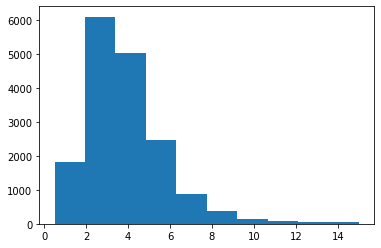

In [25]:
# DATA EXPLORATION AND EDA.
import matplotlib.pyplot as plt
%matplotlib inline

train_df.describe()
# print(train_df.shape)

plt.hist(train_df.median_income)
print(train_df.median_income.mean())
train_df.median_income.head(3)

In [26]:
#THE GOAL RIGHT NOW IS TO LEARN HOW TO FIT 
#USING THE VARIOUS ALGORITHMS.

#SPLIT TRAINNING DATASET INTO TRAINNING, VALIDATION
X = train_df.drop(columns='median_house_value')
y = train_df.median_house_value

#UNSCALED DATA
X_train,X_validate,y_train,y_validate = model_selection.train_test_split(
    X,y, test_size = 0.3, random_state=98
)

#SCALED DATA
cal_scaled = preprocessing.StandardScaler().fit_transform(
    X
)

Xs_train,ys_train,Xs_validate,ys_validate = model_selection.train_test_split(
    X,y, test_size = 0.3, random_state=98
)



#MODEL FITTING

In [29]:
# X_train.shape
y_train.shape

(11900,)

In [33]:
#COME UP WITH A MODEL.
#CHOOSE FROM DUMMY,LINEAR_REGRESS,ELASTIC NET,RIDGE,LASSO,
#SVM, XGBOOST,KNN,DECISION TREES, RANDOM FOREST, LIGHTGBM REGRESSION.

#SHOULD I CREATE A PIPELINE?
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



In [ ]:

from sklearn.model_selection import (KFold, cross_val_score)
for model in [
    LinearRegression,KNeighborsRegressor,SVR,DecisionTreeRegressor,
    RandomForestRegressor,XGBRegressor,LGBMRegressor
]:
    cls = model()
    kfold = KFold(n_splits=10)
    s = cross_val_score(cls,X_train,y_train, cv=kfold)

    print(f"{model.__name__:22} AUC: "
    f"{s.mean():.3f} STD: {s.std():.2f}"
    )


LinearRegression       AUC: 0.640 STD: 0.02
KNeighborsRegressor    AUC: 0.249 STD: 0.02
SVR                    AUC: -0.052 STD: 0.01
DecisionTreeRegressor  AUC: 0.619 STD: 0.02


In [42]:
#LGBMRegreOssor SEEMS PROMISING.
model = LGBMRegressor()
model.fit(X_train,y_train)
model.score(X_validate,y_validate)

0.8295429111448709

# WE USED LGBMREGRESSOR

In [68]:
test_df.head()
x=test_df.drop(columns='median_house_value')
y=test_df['median_house_value']
print(type(y),y.shape)
predict = model.predict(x)
print(predict[:4])
y.head(4)
model.score(x,y)


<class 'pandas.core.series.Series'> (3000,)
[405239.2231216  195681.59442812 268525.39777572 340911.83524347]


0.8128194548289347

In [75]:
y=test_df.median_house_value

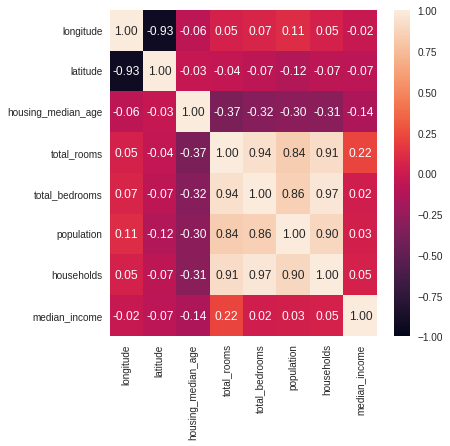

In [81]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(6,6))

ax = heatmap(
    x.corr(),
    ax=ax,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f'
)
# pcv = Rank2D(
#     features=x.columns, algorithm='pearson'
# )
# pcv.fit(x,y)
# pcv.poof()